In [1]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import time, os, pickle
from math import comb
from random import uniform, seed, choice
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from copy import deepcopy
from itertools import combinations
from IMGraph import IMGraph
from utils import *
from vis_functions import vis_methods_spread, vis_methods_time, vis_methods, vis_feature_delta

In [2]:
os.makedirs("./figures/", exist_ok=True)
os.makedirs("./IM_G_instances/", exist_ok=True)

In [3]:
# For autodl
dolphin_file_name = "./data/dolphins/dolphins.gml"
hens_file_name = "./data/hens/aves-hens-pecking-order.edges"
songbird_file_name = "./data/songbird/aves-songbird-social.edges"
wiki_vote_file_name = "./data/wiki_vote/soc-wiki-Vote.mtx"
sparrow_file_name = "./data/sparrow/aves-sparrow-social.edges"
retweet_file_name = "./data/retweet/rt-retweet.mtx"
karate_file_name = "./data/karate/soc-karate.mtx"
dataset_names = [
    "dolphin",
    "hens",
    "songbird",
    "sparrow",
    "retweet",
    "karate"
]

is_directed = [
    False,
    False,
    False,
    False,
    True,
    False
]

dataset_list = [
    dolphin_file_name,
    hens_file_name,
    songbird_file_name,
    sparrow_file_name,
    retweet_file_name,
    karate_file_name
]

In [4]:
# For local test
dolphin_file_name = "/Users/chenxiaolong/Desktop/ddm/5056/final/dolphins/dolphins.gml"
hens_file_name = "./data/aves-hens-pecking-order/aves-hens-pecking-order.edges"
songbird_file_name = "./data/aves-songbird-social/aves-songbird-social.edges"
wiki_vote_file_name = "./data/soc-wiki-Vote/soc-wiki-Vote.mtx"
sparrow_file_name = "./data/aves-sparrow-social/aves-sparrow-social.edges"
retweet_file_name = "./data/rt-retweet/rt-retweet.mtx"
karate_file_name = "./data/soc-karate/soc-karate.mtx"
dataset_names = [
    "dolphin",
    "hens",
    "songbird",
    "sparrow",
    "retweet",
    "karate"
]
is_directed = [
    False,
    False,
    False,
    False,
    True,
    False
]
dataset_list = [
    dolphin_file_name,
    hens_file_name,
    songbird_file_name,
    sparrow_file_name,
    retweet_file_name,
    karate_file_name
]

In [5]:
# Cell to test file input, load graph
for i in range(len(dataset_names)):
    cur_file = dataset_list[i]
    IM_G = IMGraph(cur_file, mc=1000,directed=is_directed[i])
    

# Run all methods for every dataset

100%|██████████| 4/4 [00:01<00:00,  2.18it/s]


Number of MC simulations for RIS: 3000


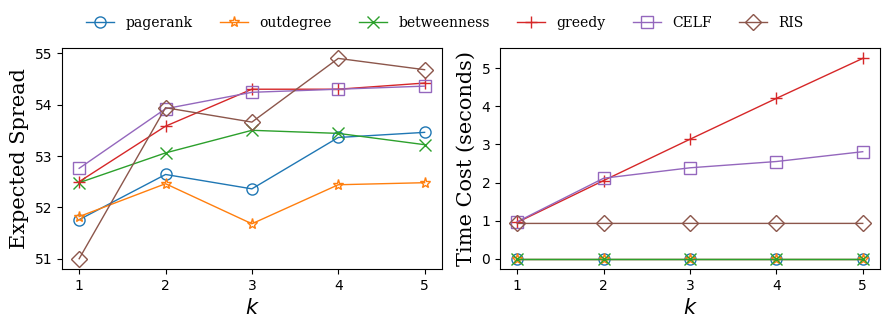

In [6]:
properties = []
IM_G_list = []
np.random.seed(5001)
for i in range(len(dataset_list)):
# for i in range(1):
    file_path = dataset_list[i]
    IM_G = IMGraph(file_path, mc=50)
    
    IM_G.run_proxy_methods()
    IM_G.run_greedy()
    IM_G.run_celf()
    IM_G.run_RIS(num_mc=3000)
    IM_G.estimate_spread("RIS")
    
    properties.append(IM_G.get_properties())
    IM_G_list.append(IM_G)
    
    save_instance(IM_G, f"./IM_G_instances/IM_G_{i}.pickle")
    # vis_methods_spread(IM_G, save_to_path=f"./figures/method_spread_{dataset_names[i]}.eps")
    # vis_methods_time(IM_G, save_to_path=f"./figures/method_time_{dataset_names[i]}.eps")
    # vis_methods(IM_G)
    vis_methods(IM_G, save_to_path=f"./figures/methods_{dataset_names[i]}.eps")

# Load classes from stored files

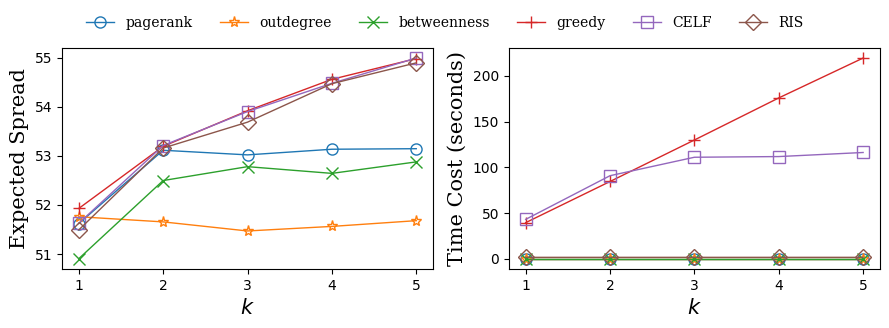

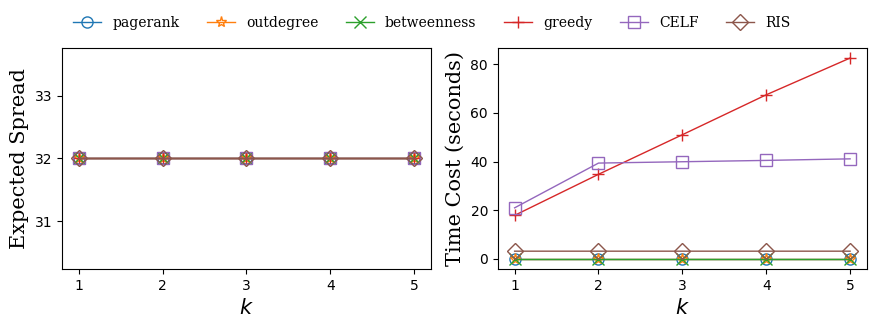

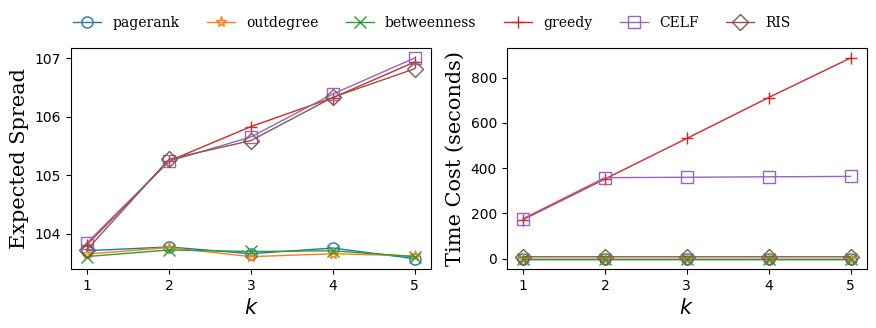

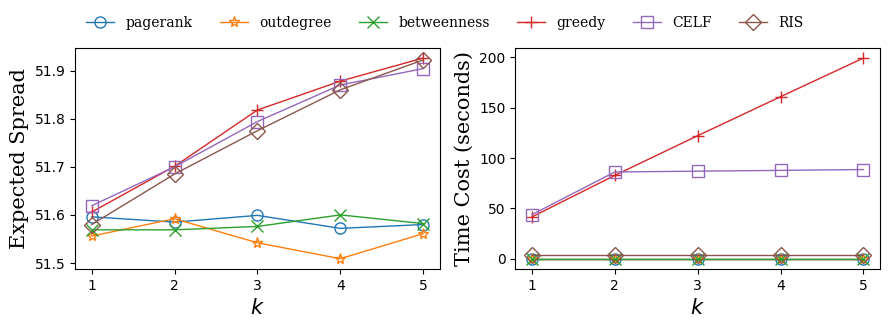

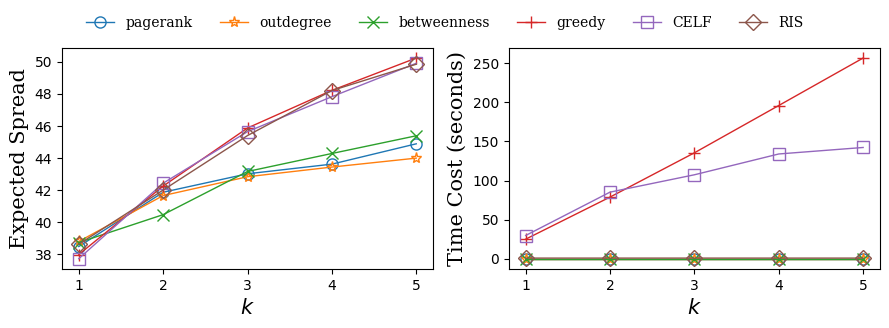

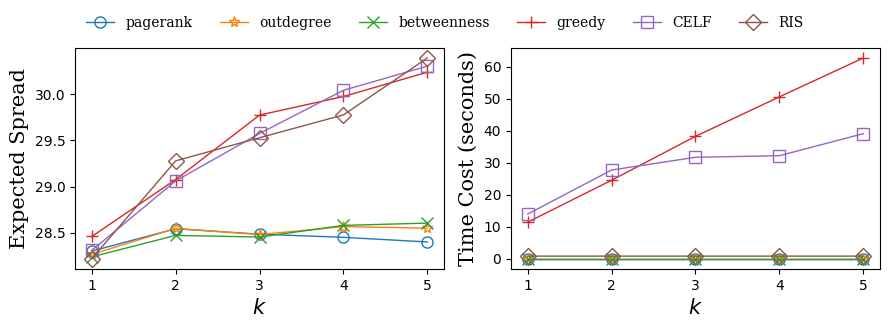

In [5]:
IM_G_list = []
property_list= []
for i in range(0, len(dataset_list)):
    cur_G = load_instance(f"./IM_G_instances/IM_G_{i}.pickle")
    IM_G_list.append(cur_G)
    property_list.append(cur_G.get_properties())
    vis_methods(cur_G)
    

# Feature list

In [6]:
density_list = [item["density"] for item in property_list]
diameter_list = [item["diameter"] for item in property_list]
avg_shortest_path_length_list = [item["avg_shortest_path_length"] for item in property_list]
clustering_coefficient_list = [item["clustering_coefficient"] for item in property_list]

In [11]:
delta_deg_list = []
delta_betw_list = []
delta_pr_list = []
for i, G in zip(range(0, len(dataset_list)), IM_G_list):
    print(dataset_names[i], G.n, G.m)
    
    spread_k = [item[G.k-1] for item in G.method_spread_map.values()]
    delta_deg_list.append((max(spread_k) - G.method_spread_map["outdegree"][-1])/max(spread_k))
    delta_betw_list.append((max(spread_k) - G.method_spread_map["betweenness"][-1])/max(spread_k))
    delta_pr_list.append((max(spread_k) - G.method_spread_map["pagerank"][-1])/max(spread_k))
    # delta_deg_list.append(G.method_spread_map["outdegree"][-1]/max(spread_k))
    # delta_betw_list.append(G.method_spread_map["betweenness"][-1]/max(spread_k))
    # delta_pr_list.append(G.method_spread_map["pagerank"][-1]/max(spread_k))

dolphin 62 159
{'pagerank': [0.0001685619354248047, 0.0001685619354248047, 0.0001685619354248047, 0.0001685619354248047, 0.0001685619354248047], 'outdegree': [3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05], 'betweenness': [0.0004146099090576172, 0.0004146099090576172, 0.0004146099090576172, 0.0004146099090576172, 0.0004146099090576172], 'greedy': [39.39328169822693, 84.42468929290771, 129.80403351783752, 175.83582949638367, 219.46409392356873], 'CELF': [42.978689432144165, 90.76330304145813, 110.94848775863647, 111.69502377510071, 116.15583658218384], 'RIS': [1.4755644798278809, 1.4766757488250732, 1.476822853088379, 1.4769492149353027, 1.4770519733428955]}
hens 32 496
{'pagerank': [6.604194641113281e-05, 6.604194641113281e-05, 6.604194641113281e-05, 6.604194641113281e-05, 6.604194641113281e-05], 'outdegree': [3.4332275390625e-05, 3.4332275390625e-05, 3.4332275390625e-05, 3.4332275390625e-05, 3.4332275390625e-05], 'betweenness': [0.00013804435

In [8]:
feature_name_list = ["Density", "Diameter", "Avg. dist.", "Clust. Coef."]
feature_data_list = [
    density_list,
    diameter_list,
    avg_shortest_path_length_list,
    clustering_coefficient_list
]

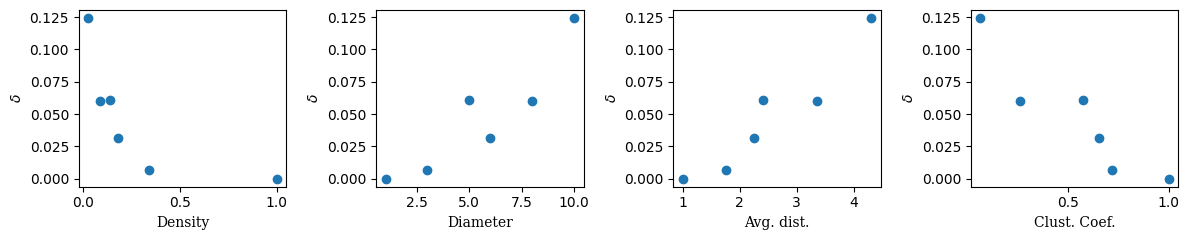

In [10]:
vis_feature_delta(feature_name_list, feature_data_list, delta_deg_list, save_to_path="./figures/delta_deg.eps")

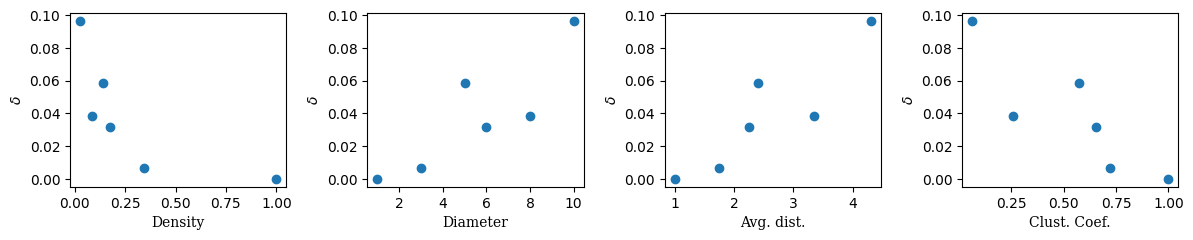

In [18]:
vis_feature_delta(feature_name_list, feature_data_list, delta_betw_list, save_to_path="./figures/delta_betw.eps")

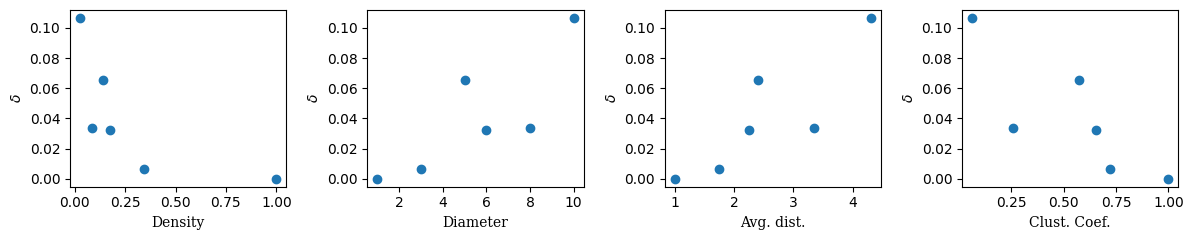

In [19]:
vis_feature_delta(feature_name_list, feature_data_list, delta_pr_list, save_to_path="./figures/delta_pr.eps")